In [15]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
ridge = Ridge()
lasso = Lasso()
net   = ElasticNet()
from scipy.stats.stats import pearsonr
%matplotlib inline
from subprocess import check_output
import matplotlib
import sklearn.model_selection as ms
import sklearn
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [3]:
# get data
train = pd.read_csv('WithLogsAndNewFeats.csv')
test = pd.read_csv('test.csv')

In [4]:
# make X and y for train test split
X = train.drop(columns = ['SalePrice'])
y = train["SalePrice"]

(1010, 185) (1010,)
(434, 185) (434,)
RMSE on test  0.13082148994746717
R2 on test  0.9000826034187339
test R^2  0.900
test RSS is equal to 7.428
RMSE on train  0.09882342487333187
R2 on train  0.9363910223728904
train R^2 : 0.936
train RSS : to 9.864
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     83.00
Date:                Sun, 25 Aug 2019   Prob (F-statistic):               0.00
Time:                        12:35:58   Log-Likelihood:                 904.44
No. Observations:                1010   AIC:                            -1503.
Df Residuals:                     857   BIC:                            -750.5
Df Model:                         152                                         
Covariance Type:            nonrobust

C:\Users\jdsip\anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\jdsip\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\jdsip\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\jdsip\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     48.88
Date:                Sun, 25 Aug 2019   Prob (F-statistic):          1.90e-147
Time:                        12:35:58   Log-Likelihood:                 462.09
No. Observations:                 434   AIC:                            -640.2
Df Residuals:                     292   BIC:                            -61.81
Df Model:                         141                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Unnamed: 0            -7.272e-

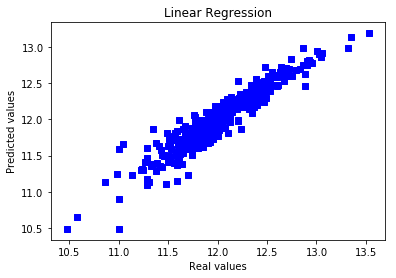

In [25]:
 # create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
# fit a model
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
## The line / model
plt.scatter(y_test, predictions, color = "blue", marker ="s", label = "Training data")
plt.title("Linear Regression")
plt.xlabel("Real values")
plt.ylabel("Predicted values")

# prediction on test
predict_test_lm = lm.predict(X_test)
print("RMSE on test " , np.sqrt(mean_squared_error(y_test,predict_test_lm)))
print("R2 on test " , r2_score(y_test, predict_test_lm))
# print ("test Score: ", model.score(X_test, y_test))
print('test R^2  %.3f' %(lm.score(X_test, y_test)))
print('test RSS is equal to %.3f' %(np.sum((y_test-lm.predict(X_test))**2))) 
print('adjusted R2 is .940')


# prediction on train
predict_train_lm = lm.predict(X_train)
print("RMSE on train " , np.sqrt(mean_squared_error(y_train,predict_train_lm)))
print("R2 on train " , r2_score(y_train, predict_train_lm))
# print ("train Score : ", model.score(X_train, y_train))
print('train R^2 : %.3f' %(lm.score(X_train, y_train)))
print('train RSS : to %.3f' %(np.sum((y_train-lm.predict(X_train))**2))) 
print('adjusted R2 is .925')

model1=sm.OLS(y_train,X_train)
result=model1.fit()
print(result.summary())

model2=sm.OLS(y_test,X_test)
result2=model2.fit()
print(result2.summary())